In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

# Figure 2: three-dimensional rewards space

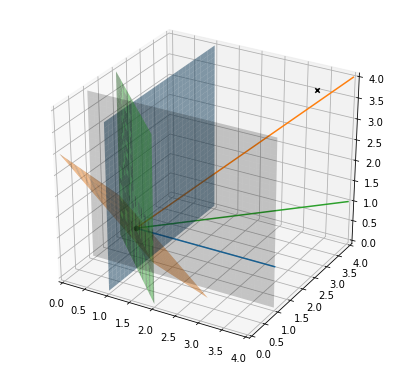

In [4]:
# Set up figure and axis limits
fig = plt.figure(figsize=(7,6.5))
ax = plt.axes(projection="3d")
Rmax = 4

# Plot supply point
ax.scatter3D([1], [1], [1],c=['k'])
ax.scatter3D([3.5], [3.5], [3.8],c=['k'],marker='x')

# Plot specialist ZNGI and impact vector (blue)
x = np.linspace(0, Rmax, 30)
y = np.linspace(0, Rmax, 30)
X, Y = np.meshgrid(x, y)
Z = np.ones(np.shape(X))
ax.plot3D([1, Rmax], [1, 1], [1, 1], color=sns.color_palette()[0])
ax.plot_surface(Z,X,Y, rstride=1, cstride=1, edgecolor='none',alpha=0.5, color=sns.color_palette()[0])

# Plot projection plane. To make other planes, like in Fig. S3, permute X, Y and Z.
ax.plot_surface(X,Z,Y, rstride=1, cstride=1, edgecolor='none',alpha=0.2, color='k')

# Plot green ZNGI and impact vector
x = np.linspace(0, 2, 30)
y = np.linspace(0, Rmax, 30)
X, Y = np.meshgrid(x, y)
Z = 1-(X-1)
ax.plot3D([1, Rmax], [1, Rmax], [1, 1], color=sns.color_palette()[2])
ax.plot_surface(X,Z,Y, rstride=1, cstride=1, edgecolor='none',alpha=0.5, color=sns.color_palette()[2])

# Plot orange ZNGI and impact vector
x = np.linspace(0, 2, 30)
y = np.linspace(0, 2, 30)
X, Y = np.meshgrid(x, y)
Z = 1-(X-1)-(Y-1)
ax.plot3D([1, Rmax], [1, Rmax], [1, Rmax], color=sns.color_palette()[1])
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, edgecolor='none',alpha=0.5, color=sns.color_palette()[1])

# Set axis limits
ax.set_xlim((0,Rmax))
ax.set_ylim((0,Rmax))
ax.set_zlim((0,Rmax))

# Save
pdf = bpdf.PdfPages('3D.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Figure 3: Specialist plant population versus visit quality

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


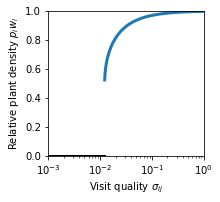

In [5]:
#Compute Rstar, d_i and s_ij using parameter values listed in caption
Rstar = 0.004/(.2*1*.4) #From Eq. 7 of main text
d = 0.04*Rstar*1.2/.2 #From Eq. C6 of Appendix C
sij = .4*.8*.2*(1-d)/(1.2*.008*.4*Rstar) #From Eq. C7 of Appendix C

#Make quality axis
sigvec = np.logspace(np.log10(4/sij),0,1000) 

#Set up plots
fig,ax=plt.subplots(figsize=(3,3))
fig.subplots_adjust(left=0.18,bottom=0.21)

#Compute plant abundance from Eq. C5 of Appendix C (after multiplying through by wi)
pvec = 1- 0.5*(1-d)*(1-np.sqrt(1-4/(sij*sigvec*(1-d))))

#Plot result
ax.plot(sigvec,pvec,lw=3)
ax.plot([1e-3,4/sij],[0,0],'k',lw=3)

#Set axis limits, log scale, labels
ax.set_ylim((0,1))
ax.set_xscale('log')
ax.set_xlabel(r'Visit quality $\sigma_{ij}$')
ax.set_ylabel(r'Relative plant density $p_i w_i$')
ax.set_xlim((1e-3,1))
pdf = bpdf.PdfPages('plant_threshold.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Figure S1

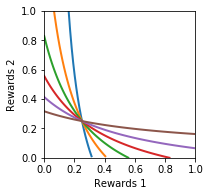

In [6]:
S = 6 #Number of ZNGI's to plot

#Create parameters for uniformly spaced ZNGI's 
eps=0.2
theta = np.linspace(0+eps,np.pi/2-eps,S)
c = np.zeros((2,S))
c[0,:]=np.cos(theta)
c[1,:]=np.sin(theta)
c = (c/c.sum(axis=0))*.5
k = np.kron(np.ones((S,1)),np.ones(2)).T
p = np.ones(2)
mu = np.ones(S)*0.1

#Set up rewards axes
R1 = np.linspace(0,1,100)
R2 = []
#Compute ZNGI's as defined in Table 2, using Eq. D1 for f_ij. (required solving for R_2 in terms of R_1)
for j in range(S):
    R2.append((mu[j]*k[0,j]*k[1,j]*p[0]*p[1]-R1*k[1,j]*p[1]*(c[0,j]*p[0]-mu[j]))
              /(R1*(c[0,j]*p[0]+c[1,j]*p[1]-mu[j])+k[0,j]*p[0]*(c[1,j]*p[1]-mu[j])))
R2 = np.asarray(R2).T
R2[R2<0]=np.nan

#Make the plot
fig,ax=plt.subplots(figsize=(3,3))
fig.subplots_adjust(left=0.2,bottom=0.2)
ax.plot(R1,R2,lw=2)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_xlabel('Rewards 1')
ax.set_ylabel('Rewards 2')
pdf = bpdf.PdfPages('saturate.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

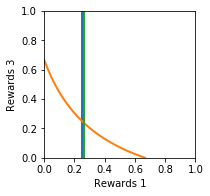

In [8]:
#Create parameters for nested network with saturating rewards
S = 3
c = np.asarray([[0.0,1],[0.5,0.5],[0.0,1]]).T
c = (c/c.sum(axis=0))*.5
k = np.kron(np.ones((S,1)),np.ones(2)).T
p = np.ones(2)
mu = np.ones(S)*0.1
mu[-1] = mu[-1]/0.96

R3 = np.linspace(0,1,100)
R1 = []
for j in range(S):
    R1.append((mu[j]*k[0,j]*k[1,j]*p[0]*p[1]-R3*k[1,j]*p[1]*(c[0,j]*p[0]-mu[j]))
              /(R3*(c[0,j]*p[0]+c[1,j]*p[1]-mu[j])+k[0,j]*p[0]*(c[1,j]*p[1]-mu[j])))
R1 = np.asarray(R1).T
R1[R1<0]=np.nan

fig,ax=plt.subplots(figsize=(3,3))
fig.subplots_adjust(left=0.2,bottom=0.2)
ax.plot(R1,R3,lw=2)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_xlabel('Rewards 1')
ax.set_ylabel('Rewards 3')
pdf = bpdf.PdfPages('saturate_nest.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Figure S2

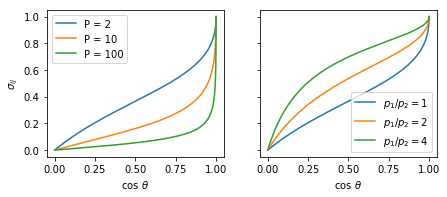

In [9]:
#Vary foraging effort
alpha = np.linspace(0,1,1000)

#First panel
fig,ax=plt.subplots(1,2,sharey=True,figsize=(7,3))
fig.subplots_adjust(bottom=0.2)
for P in [2,10,100]:
    sigmaij = alpha #with all plant populations and parameters identical, quality equals effort
    alphak = (1-alpha)/(P-1) #Divide effort not dedicated to species i evenly among all other species
    costh = alpha/np.sqrt(alpha**2+(P-1)*alphak**2) #Compute cosine of angle between impact vector and rewards axis i
    ax[0].plot(costh,sigmaij,label = 'P = '+str(P)) 
ax[0].legend()
ax[0].set_xlabel(r'cos $\theta$')
ax[0].set_ylabel(r'$\sigma_{ij}$')

for p1p2 in [1,2,4]:
    sigmaij = p1p2*alpha/(p1p2*alpha+(1-alpha)) #Compute quality for two plants, where p1p2 = p1/p2
    costh = alpha/np.sqrt(alpha**2+(1-alpha)**2) #Compute cosine between impact vector and rewards axis 1
    ax[1].plot(costh,sigmaij,label = r'$p_1/p_2 = $'+str(p1p2)) 
ax[1].set_xlabel(r'cos $\theta$')
ax[1].legend()
pdf = bpdf.PdfPages('cos.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()
